# Proyek Analisis Data: Bike Sharing
- **Nama:** Dhyanna Lisa Rahmadona Putri
- **Email:** dhyannalisaa@gmail.com
- **ID Dicoding:** Input Username

## Pertanyaan Bisnis

- Musim apa yang memiliki jumlah penyewaan terbanyak?
- Hari apa yang memiliki jumlah penyewaan terbanyak?

## Packages/Library yang Digunakan

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Load day.csv

In [65]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Load hour.csv

In [66]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Memeriksa informasi data pada tabel day_df

In [67]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memeriksa jumlah data duplikat pada tabel day_df

In [68]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa parameter statistik pada tabel day_df

In [69]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Memeriksa informasi data tabel pada hour_df

In [70]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Memeriksa jumlah data duplikat pada tabel hour_df

In [71]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa parameter statistik pada tabel hour_df

In [72]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Mengubah tipe data pada tabel day_df

In [73]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = day_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

In [74]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

Mengubah values pada tabel day_df

In [75]:
# Mengubah values pada kolom 'season' 
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Mengubah value pada kolom 'season' menggunakan dictionary penggantian
day_df['season'] = day_df['season'].replace(season_mapping)

# Mengubah value pada kolom 'yr' 
day_df['yr'] = day_df['yr'].replace({0: 2011, 1: 2012})

# Mengubah values pada kolom 'mnth' 
mnth_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Mengubah value pada kolom 'mnth' menggunakan dictionary penggantian
day_df['mnth'] = day_df['mnth'].replace(mnth_mapping)

# Mengubah value pada kolom 'holiday' 
day_df['holiday'] = day_df['holiday'].replace({0: 'No', 1: 'Yes'})

# Mengubah values pada kolom 'weekday' 
weekday_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Mengubah value pada kolom 'weekday' menggunakan dictionary penggantian
day_df['weekday'] = day_df['weekday'].replace(weekday_mapping)

# Mengubah value pada kolom 'workingday' 
day_df['workingday'] = day_df['workingday'].replace({0: 'No', 1: 'Yes'})
     
# Mengubah values pada kolom 'weathersit' 
weathersit_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
}

# Mengubah value pada kolom 'weathersit' menggunakan dictionary penggantian
day_df['weathersit'] = day_df['weathersit'].replace(weathersit_mapping)
     

Mengganti nama kolom pada tabel day_df

In [76]:
day_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "casual": "nonmember",
    "registered": "member",
    "cnt": "total_count"
}, inplace=True)

Menampilkan dataFrame setelah cleaning data

In [77]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    int64         
 4   month        731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weather      731 non-null    category      
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  nonmember    731 non-null    int64         
 14  member       731 non-null    int64         
 15  total_count  731 non-null    int64         
dtypes: categ

In [78]:
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,nonmember,member,total_count
0,1,2011-01-01,Spring,2011,Jan,No,Sunday,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Monday,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Tuesday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Wednesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Thursday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah tipe data pada tabel hour_df

In [79]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['season'] = hour_df.season.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

In [80]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Mengubah values pada tabel hour_df

In [81]:
# Mengubah values pada kolom 'season' 
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Mengubah value pada kolom 'season' menggunakan dictionary penggantian
hour_df['season'] = hour_df['season'].replace(season_mapping)

# Mengubah value pada kolom 'yr' 
hour_df['yr'] = hour_df['yr'].replace({0: 2011, 1: 2012})

# Mengubah values pada kolom 'mnth' 
mnth_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

# Mengubah value pada kolom 'mnth' menggunakan dictionary penggantian
hour_df['mnth'] = hour_df['mnth'].replace(mnth_mapping)

# Mengubah value pada kolom 'hr' 
hr_mapping = {
    0: '00:00 - 04:00', 1: '00:00 - 04:00', 2: '00:00 - 04:00', 3: '00:00 - 04:00',
    4: '04:00 - 08:00', 5: '04:00 - 08:00', 6: '04:00 - 08:00', 7: '04:00 - 08:00',
    8: '08:00 - 12:00', 9: '08:00 - 12:00', 10: '08:00 - 12:00', 11: '08:00 - 12:00',
    12: '12:00 - 16:00', 13: '12:00 - 16:00', 14: '12:00 - 16:00', 15: '12:00 - 16:00',
    16: '16:00 - 20:00', 17: '16:00 - 20:00', 18: '16:00 - 20:00', 19: '16:00 - 20:00',
    20: '20:00 - 00:00', 21: '20:00 - 00:00', 22: '20:00 - 00:00', 23: '20:00 - 00:00'
}

# Mengubah value pada kolom 'hr' menggunakan dictionary penggantian
hour_df['hr'] = hour_df['hr'].replace(hr_mapping)

# Mengubah value pada kolom 'holiday' 
hour_df['holiday'] = hour_df['holiday'].replace({0: 'No', 1: 'Yes'})

# Mengubah values pada kolom 'weekday' 
weekday_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Mengubah value pada kolom 'weekday' menggunakan dictionary penggantian
hour_df['weekday'] = hour_df['weekday'].replace(weekday_mapping)

# Mengubah value pada kolom 'workingday' 
hour_df['workingday'] = hour_df['workingday'].replace({0: 'No', 1: 'Yes'})
     
# Mengubah values pada kolom 'weathersit' 
weathersit_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
}

# Mengubah value pada kolom 'weathersit' menggunakan dictionary penggantian
hour_df['weathersit'] = hour_df['weathersit'].replace(weathersit_mapping)
    
# Mengubah value pada kolom 'temp', 'atemp', 'hum', 'windspeed' menggunakan skala sebenarnya
max_temp = 41
max_atemp = 50
max_hum = 100
max_windspeed = 67

hour_df['temp'] = hour_df['temp'] * max_temp
hour_df['atemp'] = hour_df['atemp'] * max_atemp
hour_df['hum'] = hour_df['hum'] * max_hum
hour_df['windspeed'] = hour_df['windspeed'] * max_windspeed

Mengganti nama kolom pada tabel hour_df

In [82]:
hour_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "weathersit" : "weather",
    "hum" : "humidity",
    "casual": "nonmember",
    "registered": "member",
    "cnt": "total_count"
}, inplace=True)

Menampilkan dataFrame setelah cleaning data

In [83]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  int64         
 4   month        17379 non-null  category      
 5   hour         17379 non-null  object        
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weather      17379 non-null  category      
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  nonmember    17379 non-null  int64         
 15  member       17379 non-null  int64         
 16  tota

In [84]:
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,nonmember,member,total_count
0,1,2011-01-01,Spring,2011,Jan,00:00 - 04:00,No,Sunday,No,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,00:00 - 04:00,No,Sunday,No,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,00:00 - 04:00,No,Sunday,No,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,00:00 - 04:00,No,Sunday,No,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,04:00 - 08:00,No,Sunday,No,Clear,9.84,14.395,75.0,0.0,0,1,1


Merge Data (Day & Hour)¶

In [85]:
all_data = day_df.merge(hour_df, on='date', suffixes=('_daily', '_hourly'))

In [86]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant_daily       17379 non-null  int64         
 1   date                17379 non-null  datetime64[ns]
 2   season_daily        17379 non-null  category      
 3   year_daily          17379 non-null  int64         
 4   month_daily         17379 non-null  category      
 5   holiday_daily       17379 non-null  category      
 6   weekday_daily       17379 non-null  category      
 7   workingday_daily    17379 non-null  category      
 8   weather_daily       17379 non-null  category      
 9   temp_daily          17379 non-null  float64       
 10  atemp_daily         17379 non-null  float64       
 11  humidity_daily      17379 non-null  float64       
 12  windspeed_daily     17379 non-null  float64       
 13  nonmember_daily     17379 non-null  int64     

In [87]:
all_data.head()

,instant_daily,date,season_daily,year_daily,month_daily,holiday_daily,weekday_daily,workingday_daily,weather_daily,temp_daily,...,weekday_hourly,workingday_hourly,weather_hourly,temp_hourly,atemp_hourly,humidity_hourly,windspeed_hourly,nonmember_hourly,member_hourly,total_count_hourly
0,1,2011-01-01,Spring,2011,Jan,No,Sunday,No,Mist,0.344167,...,Sunday,No,Clear,9.84,14.395,81.0,0.0,3,13,16
1,1,2011-01-01,Spring,2011,Jan,No,Sunday,No,Mist,0.344167,...,Sunday,No,Clear,9.02,13.635,80.0,0.0,8,32,40
2,1,2011-01-01,Spring,2011,Jan,No,Sunday,No,Mist,0.344167,...,Sunday,No,Clear,9.02,13.635,80.0,0.0,5,27,32
3,1,2011-01-01,Spring,2011,Jan,No,Sunday,No,Mist,0.344167,...,Sunday,No,Clear,9.84,14.395,75.0,0.0,3,10,13
4,1,2011-01-01,Spring,2011,Jan,No,Sunday,No,Mist,0.344167,...,Sunday,No,Clear,9.84,14.395,75.0,0.0,0,1,1


Save the cleaned dataset

In [88]:
all_data.to_csv("all_data.csv", index=False)

## Exploratory Data Analysis (EDA)

### Pengguna Bikeshare berdasarkan tahun

In [89]:
all_data.groupby(by="year_daily", observed=False).agg({
        "total_count_hourly": ["sum","mean"]
})

total_count_hourly            
                          sum        mean
year_daily                               
2011                  1243103  143.794448
2012                  2049576  234.666361

### Pengguna Bikeshare berdasarkan musim

In [90]:
all_data.groupby(by="season_daily", observed=False).agg({
        "total_count_hourly": ["sum","mean", "max", "min"]
})

total_count_hourly                     
                            sum        mean  max min
season_daily                                        
Spring                   471348  111.114569  801   1
Summer                   918589  208.344069  957   1
Fall                    1061129  236.016237  977   1
Winter                   841613  198.868856  967   1

### Pengguna Bikeshare berdasarkan bulan

In [91]:
all_data.groupby(by="month_daily", observed=False).agg({
        "total_count_hourly": ["sum","mean", "max", "min", "std"]
})

total_count_hourly                                 
                           sum        mean  max min         std
month_daily                                                    
Jan                     134933   94.424773  559   1   99.907146
Feb                     151352  112.865026  610   1  112.486565
Mar                     228920  155.410726  957   1  163.543050
Apr                     269094  187.260960  822   1  181.137902
May                     331686  222.907258  873   1  187.721497
Jun                     346342  240.515278  900   1  196.038950
Jul                     344948  231.819892  913   1  187.483806
Aug                     351194  238.097627  941   1  200.444648
Sep                     345991  240.773138  977   1  214.609531
Oct                     322352  222.158511  963   1  203.477057
Nov                     254831  177.335421  729   1  158.973887
Dec                     211036  142.303439  759   1  141.080674

### Pengguna Bikeshare pada hari kerja

In [92]:
all_data.groupby(by="weekday_daily", observed=False).agg({
        "total_count_hourly": ["sum","mean", "max", "min", "std"]
})

total_count_hourly                                 
                             sum        mean  max min         std
weekday_daily                                                    
Monday                    444027  177.468825  776   1  168.167710
Tuesday                   455503  183.744655  968   1  179.514167
Wednesday                 469109  191.238891  970   1  187.820480
Thursday                  473048  191.130505  977   1  190.894464
Friday                    485395  196.436665  976   1  188.011923
Saturday                  487790  196.135907  957   1  174.076894
Sunday                    477807  190.209793  783   1  179.820569

### Pengguna Bikeshare berdasarkan kategori pelanggan

In [93]:
all_data.groupby("year_daily", observed=False).agg({
        "nonmember_hourly": ["mean"],
        "member_hourly": ["mean"]
})

,nonmember_hourly,member_hourly
,mean,mean
year_daily,,
2011,28.600578,115.193869
2012,42.679757,191.986604


### Rata-rata total pengguna bikeshare berdasarkan tahun dan bulan

In [94]:
all_data.groupby(by=["year_daily", "month_daily"], observed=False).agg({
    "total_count_hourly": "mean",
})

total_count_hourly
year_daily month_daily                    
2011       Jan                   55.507267
           Feb                   74.291217
           Mar                   87.732877
           Apr                  131.947149
           May                  182.555108
           Jun                  199.322222
           Jul                  189.974462
           Aug                  186.991792
           Sep                  177.709902
           Oct                  166.232840
           Nov                  142.095967
           Dec                  117.844804
2012       Jan                  130.558704
           Feb                  149.041908
           Mar                  221.904441
           Apr                  242.651811
           May                  263.259409
           Jun                  281.708333
           Jul                  273.665323
           Aug                  288.310484
           Sep                  303.573611
           Oct                  280.848870
           Nov                  212.623955
           Dec                  166.729111

## Visualization & Explanatory Analysis

### Musim yang memiliki jumlah penyewaan terbanyak:

In [95]:
seasonly_data = all_data.groupby("season_daily", observed=False).agg({
    "nonmember_hourly": "mean",
    "member_hourly": "mean",
    "total_count_hourly": "mean"
})
seasonly_data.head()

,nonmember_hourly,member_hourly,total_count_hourly
season_daily,,,
Spring,14.290901,96.823668,111.114569
Summer,46.160581,162.183488,208.344069
Fall,50.287144,185.729093,236.016237
Winter,30.666824,168.202032,198.868856


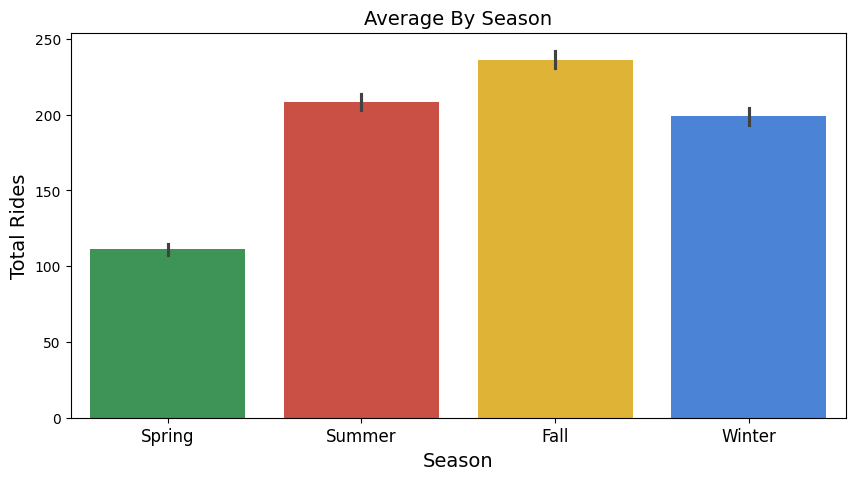

In [96]:
plt.figure(figsize=(10, 5))
colors = ["#2FA350", "#E03C2F", "#FAC11A", "#337EEF"]

sns.barplot(
    x="season_daily",
    y="total_count_hourly", 
    hue="season_daily",
    data=all_data.sort_values(by="total_count_hourly", ascending=False),
    palette=colors
)

plt.title("Average By Season", loc="center", fontsize=14)
plt.ylabel("Total Rides", loc="center", fontsize=14)
plt.xlabel("Season", loc="center", fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Hari yang memiliki jumlah penyewaan terbanyak:

In [97]:
weekday_bikesharing = all_data.groupby("weekday_daily", observed=False).agg({
    "nonmember_hourly": "sum",
    "member_hourly": "sum",
    "total_count_hourly": "sum"
})

weekday_bikesharing

,nonmember_hourly,member_hourly,total_count_hourly
weekday_daily,,,
Monday,140521,303506,444027
Tuesday,70784,384719,455503
Wednesday,57843,411266,469109
Thursday,57319,415729,473048
Friday,61460,423935,485395
Saturday,78238,409552,487790
Sunday,153852,323955,477807


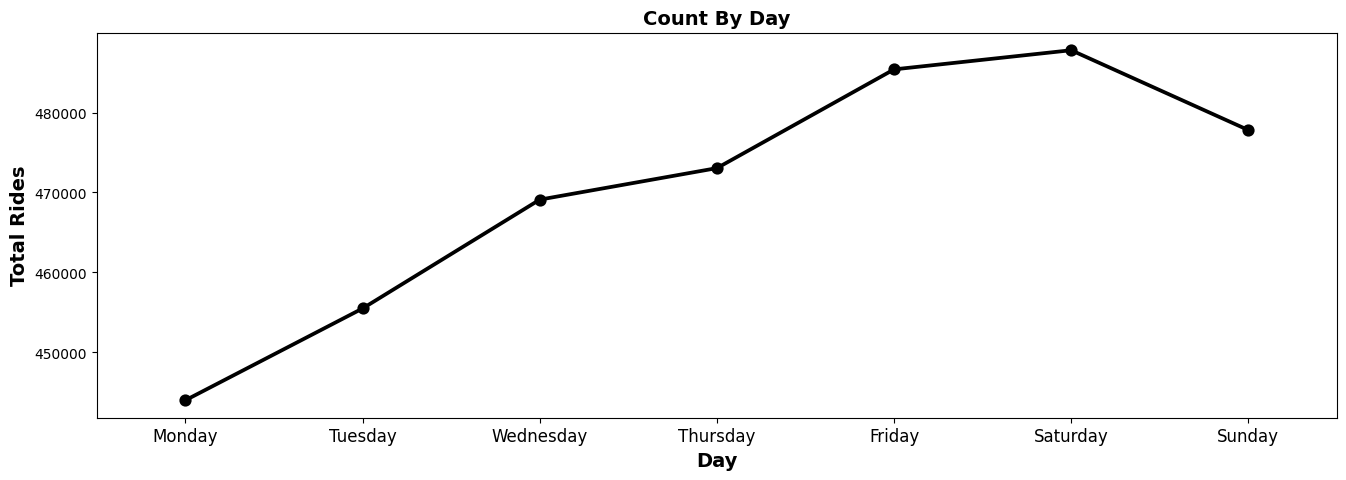

In [98]:
plt.figure(figsize=(16, 5))
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

all_data_sum = all_data.groupby("weekday_daily", observed=False)["total_count_hourly"].sum().reset_index()

sns.pointplot(
    x="weekday_daily",
    y="total_count_hourly",
    data=all_data_sum,
    color='black',  # Warna titik
    markers='o',   # Bentuk marker
    linestyles='-'
)

plt.title("Count By Day", fontsize=14, weight='bold')
plt.xlabel("Day", fontsize=14, weight='bold')
plt.ylabel("Total Rides", fontsize=14, weight='bold')
plt.tick_params(axis='x', labelsize=12)
plt.show()


## Conclusion

### Musim yang memiliki jumlah penyewaan terbanyak?

- Musim dengan jumlah penyewaan terbanyak adalah musim gugur (Fall) dengan total 236.016237 penyewaan.
- Musim dengan jumlah penyewaan terendah adalah musim semi (Spring) dengan total 111.114569 penyewaan.

### Hari yang memiliki jumlah penyewaan terbanyak?

- Hari dengan jumlah penyewaan terbanyak adalah hari Sabtu dengan total 487.790 penyewaan.
- Hari dengan jumlah penyewaan terendah adalah hari Senin dengan total 444.027 penyewaan.